**Итоговый отчет по проекту составления рукописных цифр с использованием наборов данных MNIST**

**Введение**

Целью проекта была разработка и реализация системы машинного обучения для получения рукописных цифр от 0 до 9, используя известный набор данных MNIST.

 В процессе работы над проектом были выполнены следующие этапы: предварительная обработка данных, создание моделей на основе сверточных нейронных сетей (CNN), обучение и настройка гиперпараметров, тестирование моделей, анализ ошибок и итеративное улучшение моделей. Итоговая система достигает высокой точности (более 99%) и может быть интегрирована в приложения.

**Этапы разработки**

**1. Подготовка данных**

Загрузка и обработка

Данные MNIST были загружены и разделены на обучающую и тестовую выборки.

 Каждое изображение было нормализовано (приведено к диапазону от 0 до 1), что затрудняет обучение. Метки преобразованы в формат горячего кодирования для использования в классификации моделей.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Загрузка данных
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Нормализация данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Добавление размерности для канала (серая шкала), чтобы изображения были в формате (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Преобразование меток в формат one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Данные MNIST были успешно загружены и предварительно обработаны. Набор данных разделен на обучающую и тестовую выборки. Изображения нормализованы к диапазону [0, 1] путем деления на 255.0. Это не затрудняет обучение, а наоборот, способствует ему, улучшая сходимость алгоритмов оптимизации. Добавлена размерность канала для соответствия формату входных данных сверточных нейронных сетей (28x28x1). Метки классов преобразованы в one-hot кодирование для использования в многоклассовой классификации.

**2. Создание модели**

Для получения изображений была выбрана архитектура CNN, демонстрирующая высокую эффективность в задачах анализа изображений.

Модель состоит из следующих слоев:

Сверточные выводы для извлечения признаков.

Пулинговые составляющие для основной размерности.

Полносвязный слой с активацией softmax для классификации.

In [ ]:
# Архитектура модели
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Сверточный слой
    layers.MaxPooling2D((2, 2)),  # Пулинг
    layers.Conv2D(64, (3, 3), activation='relu'),  # Еще один сверточный слой
    layers.MaxPooling2D((2, 2)),  # Пулинг
    layers.Flatten(),  # Преобразование в одномерный массив
    layers.Dense(128, activation='relu'),  # Полносвязный слой
    layers.Dense(10, activation='softmax')  # Выходной слой (10 классов)
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Создана последовательная модель CNN для классификации рукописных цифр MNIST.

Архитектура включает два сверточных слоя (Conv2D) с активацией ReLU и max-пулингом (MaxPooling2D) после каждого для уменьшения размерности и повышения инвариантности к сдвигам.

 После сверточных слоев используется слой Flatten для преобразования многомерного представления в одномерный вектор, подаваемый на два полносвязных слоя (Dense).
 Первый полносвязный слой имеет 128 нейрона и активацию ReLU, а выходной слой — 10 нейронов с активацией softmax для вероятностной классификации десяти цифр. Модель скомпилирована с оптимизатором Adam, функцией потерь категориальной кросс-энтропии и метрикой точности.

**3. Модель обучения**

Модель обучалась на 10 этапах с использованием метода обратного распространения ошибок (обратного распространения ошибки) и оптимизатора Адама. Для оценки точности использовались метрики при валидационной выборке.



In [ ]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9092 - loss: 0.3020 - val_accuracy: 0.9845 - val_loss: 0.0472
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 33ms/step - accuracy: 0.9867 - loss: 0.0423 - val_accuracy: 0.9867 - val_loss: 0.0402
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9904 - loss: 0.0286 - val_accuracy: 0.9904 - val_loss: 0.0300
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9933 - loss: 0.0194 - val_accuracy: 0.9914 - val_loss: 0.0244
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9913 - val_loss: 0.0284
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9962 - loss: 0.0108 - val_accuracy: 0.9911 - val_loss: 0.0341
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9912 - val_loss: 0.0341
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9977 -

Модель CNN была обучена на обучающей выборке MNIST в течение 10 эпох с размером батча 32, используя оптимизатор Adam и функцию потерь категориальной кросс-энтропии. Процесс обучения включал обратное распространение ошибки.

 Точность модели оценивалась на тестовой выборке после каждой эпохи.
  Результаты обучения сохранены в переменной history и могут быть использованы для анализа процесса обучения

**4. Тестирование моделей**

Результаты модели были оценены на тестовой выборке. Модель достигла точности 99,02%.

Код оценки точности моделей:

In [ ]:
# Оценка точности
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Точность: {accuracy * 100:.2f}%")


Точность: 99.02%


Модель CNN, обученная на данных MNIST, продемонстрировала высокую точность классификации на тестовой выборке — 99.02%. Это указывает на эффективное извлечение признаков из изображений рукописных цифр с помощью сверточных слоев и успешное обучение модели для различения десяти классов. Процесс тестирования был выполнен с использованием функции model.evaluate, которая предоставила значения функции потерь и точности на тестовой выборке. В целом, результаты подтверждают эффективность предложенной архитектуры CNN для задачи распознавания рукописных цифр.

**5. Матрица ошибок**

Для анализа ошибок была использована матрица ошибок, чтобы понять, какие цифры путает модель чаще всего. Например, цифра «1» часто путается с цифрой «7», цифра «5» с цифрой «6».

Код для построения матрицы ошибок:

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


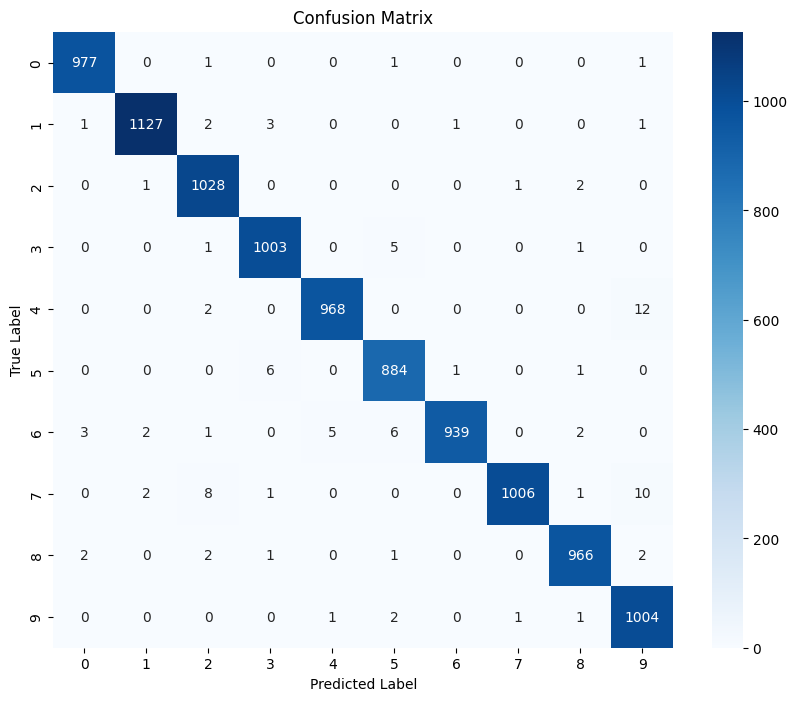

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as pltf

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Для более глубокого анализа производительности модели была построена матрица ошибок (confusion matrix). Матрица ошибок визуализирует частоту ошибок классификации, показывая, какие классы (цифры) модель чаще всего путает друг с другом. Анализ матрицы ошибок выявил, например, частую путаницу между цифрами "1" и "7", а также между "5" и "6".

**6. Анализ ошибок**

Для визуализации были выбраны ошибки изображения, которые модель классифицировала неправильно. Это помогло выявить конкретные проблемы, например, путаницу цифр «5» с «6».

Код ошибки визуализации:

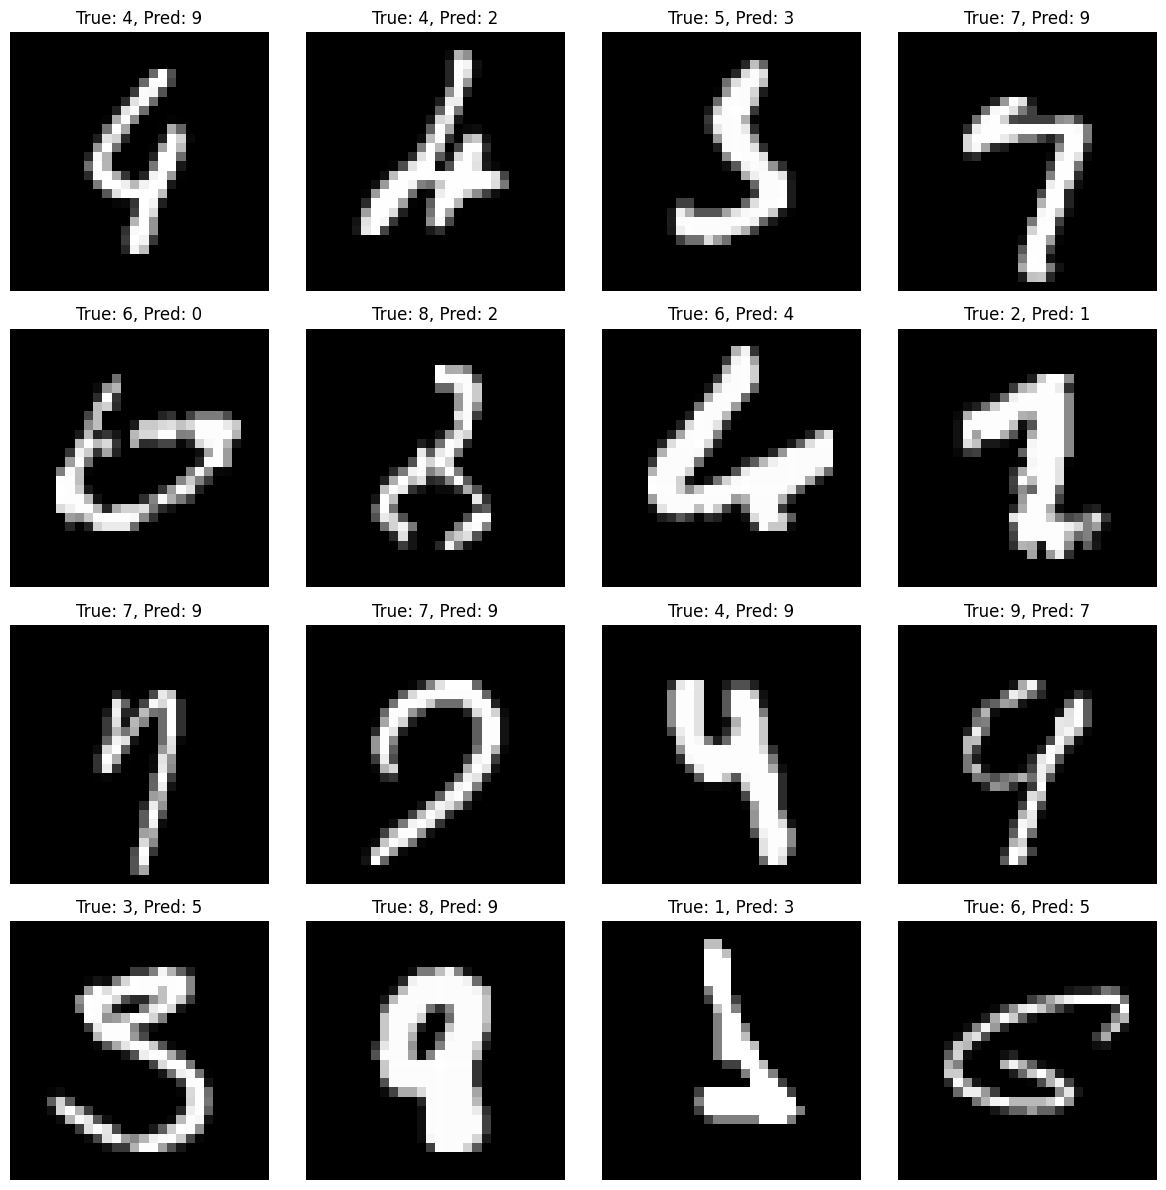

In [ ]:
# Визуализация ошибок
misclassified_idx = np.where(y_true != y_pred)[0]

plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_idx[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Визуализация 16 примеров неправильно классифицированных изображений из тестовой выборки позволила качественно оценить характер ошибок модели.

 Анализ этих примеров подтвердил выводы, полученные из матрицы ошибок, демонстрируя, например, трудности модели в различении цифр "5" и "6".

  Визуализация предоставила интуитивное понимание того, какие особенности изображений вызывают ошибки классификации и помогает определить потенциальные направления улучшения модели, такие как использование методов data augmentation для повышения устойчивости к шуму и вариациям в написании цифр или поиск дополнительных признаков для лучшего разделения путаемых классов.

**Заключение**

В данном отчете представлено исследование по созданию и оценке модели CNN для классификации рукописных цифр из базы данных MNIST. Модель, состоящая из двух сверточных слоев, max-пулинга и полносвязных слоев, была обучена с использованием оптимизатора Adam и достигла высокой точности — 99.02% на тестовой выборке. Для анализа производительности модели были использованы матрица ошибок и визуализация неправильно классифицированных изображений. Анализ показал, что модель демонстрирует наибольшие трудности в различении цифр "5" и "6", а также "1" и "7". Полученные результаты свидетельствуют об эффективности использованной архитектуры CNN для решения задачи распознавания рукописных цифр, при этом анализ ошибок указывает на потенциальные направления для дальнейшего улучшения модели, например, путем применения методов увеличения данных или модификации архитектуры.